# Etapa 1 - Implementação de algoritmo de ML (NaiveBayes Multinomial)
## Problemas encontrados com a base:
- Na realização dessa primeira etapa do trabalho para o Processamento de Linguagem Natural (PLN), escolhemos o algoritmo Naive Bayes Multinomial para a realização da classificação dos textos presentes na base de dados.
- Como pré-processamento da base de dados, é realizada a remoção das 'stopwords' para a montagem do corpus e depois dessa etapa já é possível executarmos o algoritmo para a classificação do texto.

# Task: 1
## - Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from math import sqrt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Task 2:
## Open DataFrame

In [3]:
train_data = pd.read_csv("/content/Reviews_Classified5k.csv")
train_data = train_data.drop(columns="Unnamed: 0")
test_data = train_data

# Task 3:
## - Remove stopwords from text and create corpus

In [4]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [5]:
corpus= []
corpus1= []
for i in range(0, 5000):
    corpus.append(review_to_words(train_data['Text'][i]))
    corpus1.append(review_to_words(train_data['Text'][i]))

In [6]:
train_data['new_Phrase']=corpus
train_data.drop(['Text'],axis=1,inplace=True)

# Task 4:
## - Show most frequent words in classification

In [7]:
positive=train_data[train_data['Classification']==('positive')]
negative=train_data[train_data['Classification']==('negative')]
neutral=train_data[train_data['Classification']==('neutral')]

words_p  = ' '.join(positive['new_Phrase'])
words_n  = ' '.join(negative['new_Phrase'])
words_ne = ' '.join(neutral['new_Phrase'])

split_word_p  = " ".join([word for word in words_p.split()])
split_word_n  = " ".join([word for word in words_n.split()])
split_word_ne = " ".join([word for word in words_ne.split()])

wordcloud_p = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word_p)

wordcloud_n = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word_n)

wordcloud_ne = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word_ne)

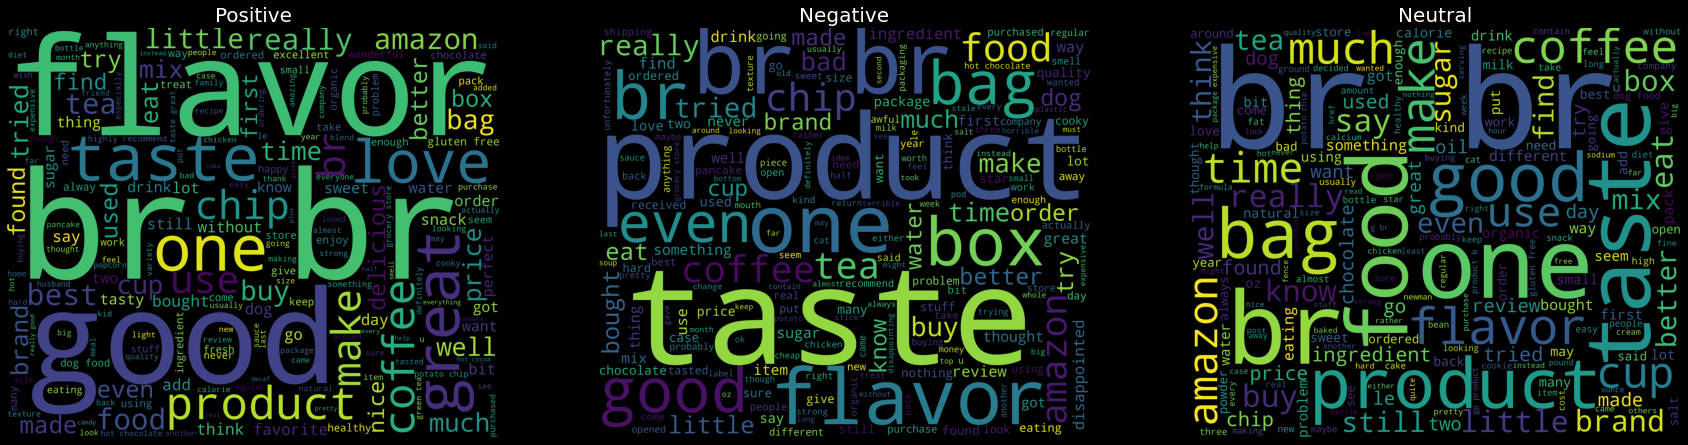

In [8]:
fig = plt.figure(figsize=(30, 30))
plt.style.use("dark_background")
fig.set_facecolor("black")

fig.add_subplot(1, 3, 1)
plt.imshow(wordcloud_p)
plt.axis('off')
plt.title("Positive", fontsize=20)

fig.add_subplot(1, 3, 2)
plt.imshow(wordcloud_n)
plt.axis('off')
plt.title("Negative", fontsize=20)

fig.add_subplot(1, 3, 3)
plt.imshow(wordcloud_ne)
plt.axis('off')
plt.title("Neutral", fontsize=20)

plt.show()

# Task 5:
## - Create count vectorizer for corpus

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:,1].values

# Task 6: 
## - Split Data Frame in train and test
## - Train and fit Naive Bayes Multinomial model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

# Task 7:
## - Calculate metrics

In [11]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

# Calculando as métricas: POSITIVOS
precisaoPOS = tp_pos / (tp_pos + fp_pos)
recallPOS = tp_pos / (tp_pos + fn_pos)
accuracyPOS = (tp_pos + vn_pos) / (tp_pos + fn_pos + fp_pos + vn_pos)
f1sPOS = 2 * (precisaoPOS * recallPOS) / (precisaoPOS + recallPOS)

# Calculando as métricas: NEGATIVOS
precisaoNEG = tp_neg / (tp_neg + fp_neg)
recallNEG = tp_neg / (tp_neg + fn_neg)
accuracyNEG = (tp_neg + vn_neg) / (tp_neg + fn_neg + fp_neg + vn_neg)
f1sNEG = 2 * (precisaoNEG * recallNEG) / (precisaoNEG + recallNEG)

# Calculando as métricas: NEUTROS
precisaoNEU = tp_neu / (tp_neu + fp_neu)
recallNEU = tp_neu / (tp_neu + fn_neu)
accuracyNEU = (tp_neu + vn_neu) / (tp_neu + fn_neu + fp_neu + vn_neu)
f1sNEU = 2 * (precisaoNEU * recallNEU) / (precisaoNEU + recallNEU)

VP neg:373	VP neu:89	VP pos:3580
FN neg:405	FN neu:276	FN pos:277
FP neg:215	FP neu:189	FP pos:554
VN neg:4007	VN neu:4446	VN pos:589
              precision    recall  f1-score   support

    negative       0.63      0.48      0.55       778
     neutral       0.32      0.24      0.28       365
    positive       0.87      0.93      0.90      3857

    accuracy                           0.81      5000
   macro avg       0.61      0.55      0.57      5000
weighted avg       0.79      0.81      0.80      5000



## - Display confusion matrix

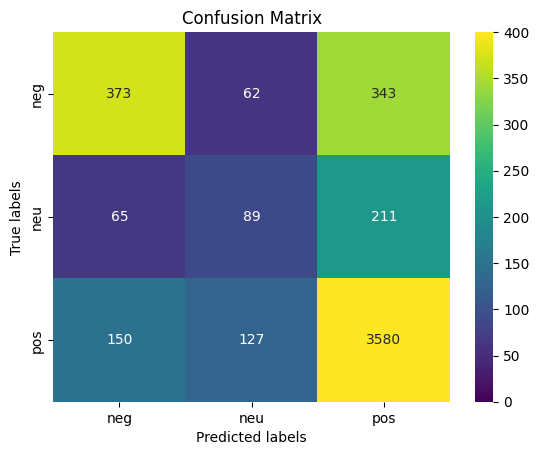

In [12]:
plt.style.use("default")
fig.set_facecolor("white")

cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=400); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);

# Task 8:
## - Open database again

In [13]:
df = pd.read_csv("/content/Reviews_Classified5k.csv")
df = df.drop(columns="Unnamed: 0")

## - How unbalanced is out Data Frame?

In [14]:
word_count=pd.value_counts(df['Classification'].values, sort=False)
y=df['Classification']
word_count

positive    3857
negative     778
neutral      365
dtype: int64

# Task 9:
## - Remove stopwords from text and create corpus

In [15]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [16]:
corpus= []
corpus1= []
for i in range(0, df.shape[0]):
    corpus.append(review_to_words(df['Text'][i]))
    corpus1.append(review_to_words(df['Text'][i]))

df['new_Phrase']=corpus
df.drop(['Text'],axis=1,inplace=True)

# Task 10:
## - Create Count Vectorizer for corpus

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = df.iloc[:,1].values

# Task 11:
## - Split Data Frame in train and test
## - Balance Data Frame (OverSample)
## - Train and fit Naive Bayes Multinomial model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_over, y_over)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

Counter({'positive': 3857, 'negative': 778, 'neutral': 365})
Counter({'positive': 773, 'neutral': 773, 'negative': 773})


# Task 12:
## - Calculate Metrics

In [19]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

# Calculando as métricas: POSITIVOS
BprecisaoPOS = tp_pos / (tp_pos + fp_pos)
BrecallPOS = tp_pos / (tp_pos + fn_pos)
BaccuracyPOS = (tp_pos + vn_pos) / (tp_pos + fn_pos + fp_pos + vn_pos)
Bf1sPOS = 2 * (BprecisaoPOS * BrecallPOS) / (BprecisaoPOS + BrecallPOS)

# Calculando as métricas: NEGATIVOS
BprecisaoNEG = tp_neg / (tp_neg + fp_neg)
BrecallNEG = tp_neg / (tp_neg + fn_neg)
BaccuracyNEG = (tp_neg + vn_neg) / (tp_neg + fn_neg + fp_neg + vn_neg)
Bf1sNEG = 2 * (BprecisaoNEG * BrecallNEG) / (BprecisaoNEG + BrecallNEG)

# Calculando as métricas: NEUTROS
BprecisaoNEU = tp_neu / (tp_neu + fp_neu)
BrecallNEU = tp_neu / (tp_neu + fn_neu)
BaccuracyNEU = (tp_neu + vn_neu) / (tp_neu + fn_neu + fp_neu + vn_neu)
Bf1sNEU = 2 * (BprecisaoNEU * BrecallNEU) / (BprecisaoNEU + BrecallNEU)

VP neg:377	VP neu:105	VP pos:3478
FN neg:401	FN neu:260	FN pos:379
FP neg:265	FP neu:253	FP pos:522
VN neg:3957	VN neu:4382	VN pos:621
              precision    recall  f1-score   support

    negative       0.59      0.48      0.53       778
     neutral       0.29      0.29      0.29       365
    positive       0.87      0.90      0.89      3857

    accuracy                           0.79      5000
   macro avg       0.58      0.56      0.57      5000
weighted avg       0.78      0.79      0.79      5000



## - Display confusion matrix

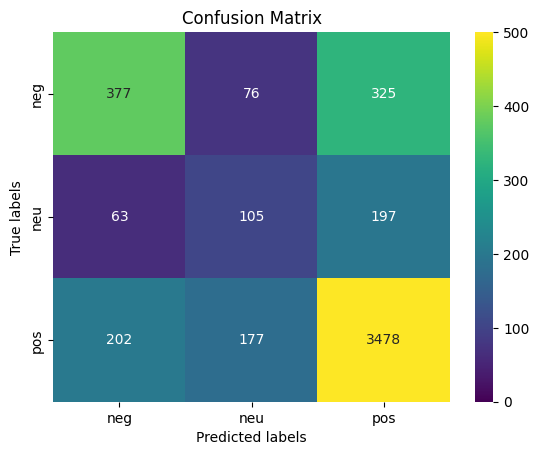

In [20]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=500); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);

## - Display graphics comparing metrics from balanced and unbalanced results

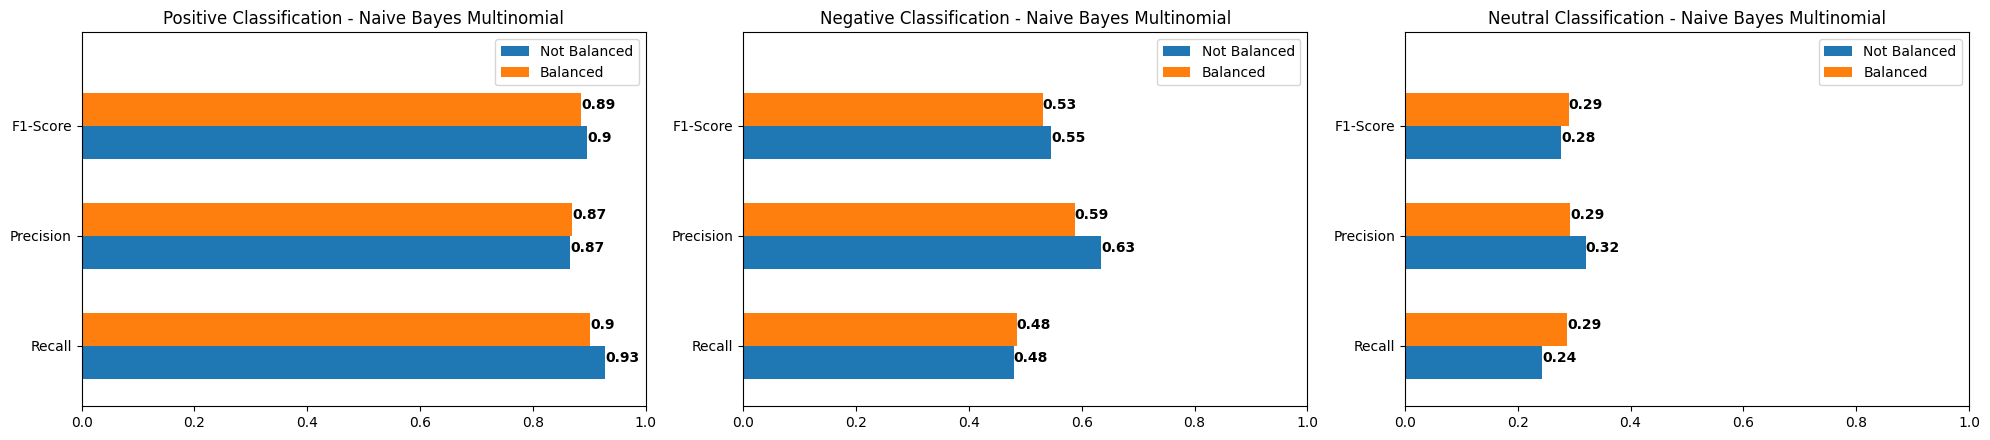

In [21]:
fix, ax = plt.subplots(1, 3, figsize = (20, 4.5))

ind = np.array([0, 1, 2])
width = 0.3

y_axis = ['Recall', 'Precision', 'F1-Score']
x_axis_PNBRF = [recallPOS, precisaoPOS, f1sPOS]; x_axis_PBRF = [BrecallPOS, BprecisaoPOS, Bf1sPOS]
x_axis_NNBRF = [recallNEG, precisaoNEG, f1sNEG]; x_axis_NBRF = [BrecallNEG, BprecisaoNEG, Bf1sNEG]
x_axis_NENBRF = [recallNEU, precisaoNEU, f1sNEU]; x_axis_NEBRF = [BrecallNEU, BprecisaoNEU, Bf1sNEU]



ax[0].barh(ind, x_axis_PNBRF, width, label='Not Balanced')
ax[0].barh(ind+width, x_axis_PBRF, width, label='Balanced')
ax[0].set_title('Positive Classification - Naive Bayes Multinomial')
ax[0].set_xlim(0, 1)

ax[1].barh(ind, x_axis_NNBRF, width, label='Not Balanced')
ax[1].barh(ind+width, x_axis_NBRF, width, label='Balanced')
ax[1].set_title('Negative Classification - Naive Bayes Multinomial')
ax[1].set_xlim(0, 1)

ax[2].barh(ind, x_axis_NENBRF, width, label='Not Balanced')
ax[2].barh(ind+width, x_axis_NEBRF, width, label='Balanced')
ax[2].set_title('Neutral Classification - Naive Bayes Multinomial')
ax[2].set_xlim(0, 1)

for i, v in enumerate(x_axis_PNBRF):
    ax[0].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NNBRF):
    ax[1].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NENBRF):
    ax[2].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

  
for i, v in enumerate(x_axis_PBRF):
    ax[0].text(v, i+width, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NBRF):
    ax[1].text(v, i+width, str(round(v,2)), color = 'black', fontweight = 'bold')
    
for i, v in enumerate(x_axis_NEBRF):
    ax[2].text(v, i+width, str(round(v,2)), color = 'black', fontweight = 'bold')

ax[0].set(yticks=ind + width/2, yticklabels=np.array(['Recall', 'Precision', 'F1-Score']),ylim=[2*width - 1, len(ind)])
ax[1].set(yticks=ind + width/2, yticklabels=np.array(['Recall', 'Precision', 'F1-Score']),ylim=[2*width - 1, len(ind)])
ax[2].set(yticks=ind + width/2, yticklabels=np.array(['Recall', 'Precision', 'F1-Score']),ylim=[2*width - 1, len(ind)])

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

plt.tight_layout()
plt.show()


# Task 13:
## - Compare Score with Naive Bayes Balanced and Unbalanced Classification

In [22]:
positive_b = []; negative_b = []; neutral_b = []

for xs, i in enumerate(y_real_pred):
  if i == 'neutral':
    neutral_b.append(train_data.iloc[xs, 7])
  elif i == 'negative':
    negative_b.append(train_data.iloc[xs, 7])
  else:
    positive_b.append(train_data.iloc[xs, 7])

positive = train_data['Score'].loc[train_data['Classification'] == 'positive']
negative = train_data['Score'].loc[train_data['Classification'] == 'negative']
neutral  = train_data['Score'].loc[train_data['Classification'] == 'neutral']

pos_b = []
neg_b = []
neu_b = []

for i in range(1, 6):
    pos_b.append(positive_b.count(i))

for i in range(1, 6):
  neg_b.append(negative_b.count(i))

for i in range(1, 6):
  neu_b.append(neutral_b.count(i))

##########################################################

pos = []
neg = []
neu = []

for ele in reversed(list(positive.value_counts())):
  pos.append(ele)

for ele in reversed(list(negative.value_counts())):
  neg.append(ele)

for ele in reversed(list(neutral.value_counts())):
  neu.append(ele)

aux = [1,2,3,4,5]

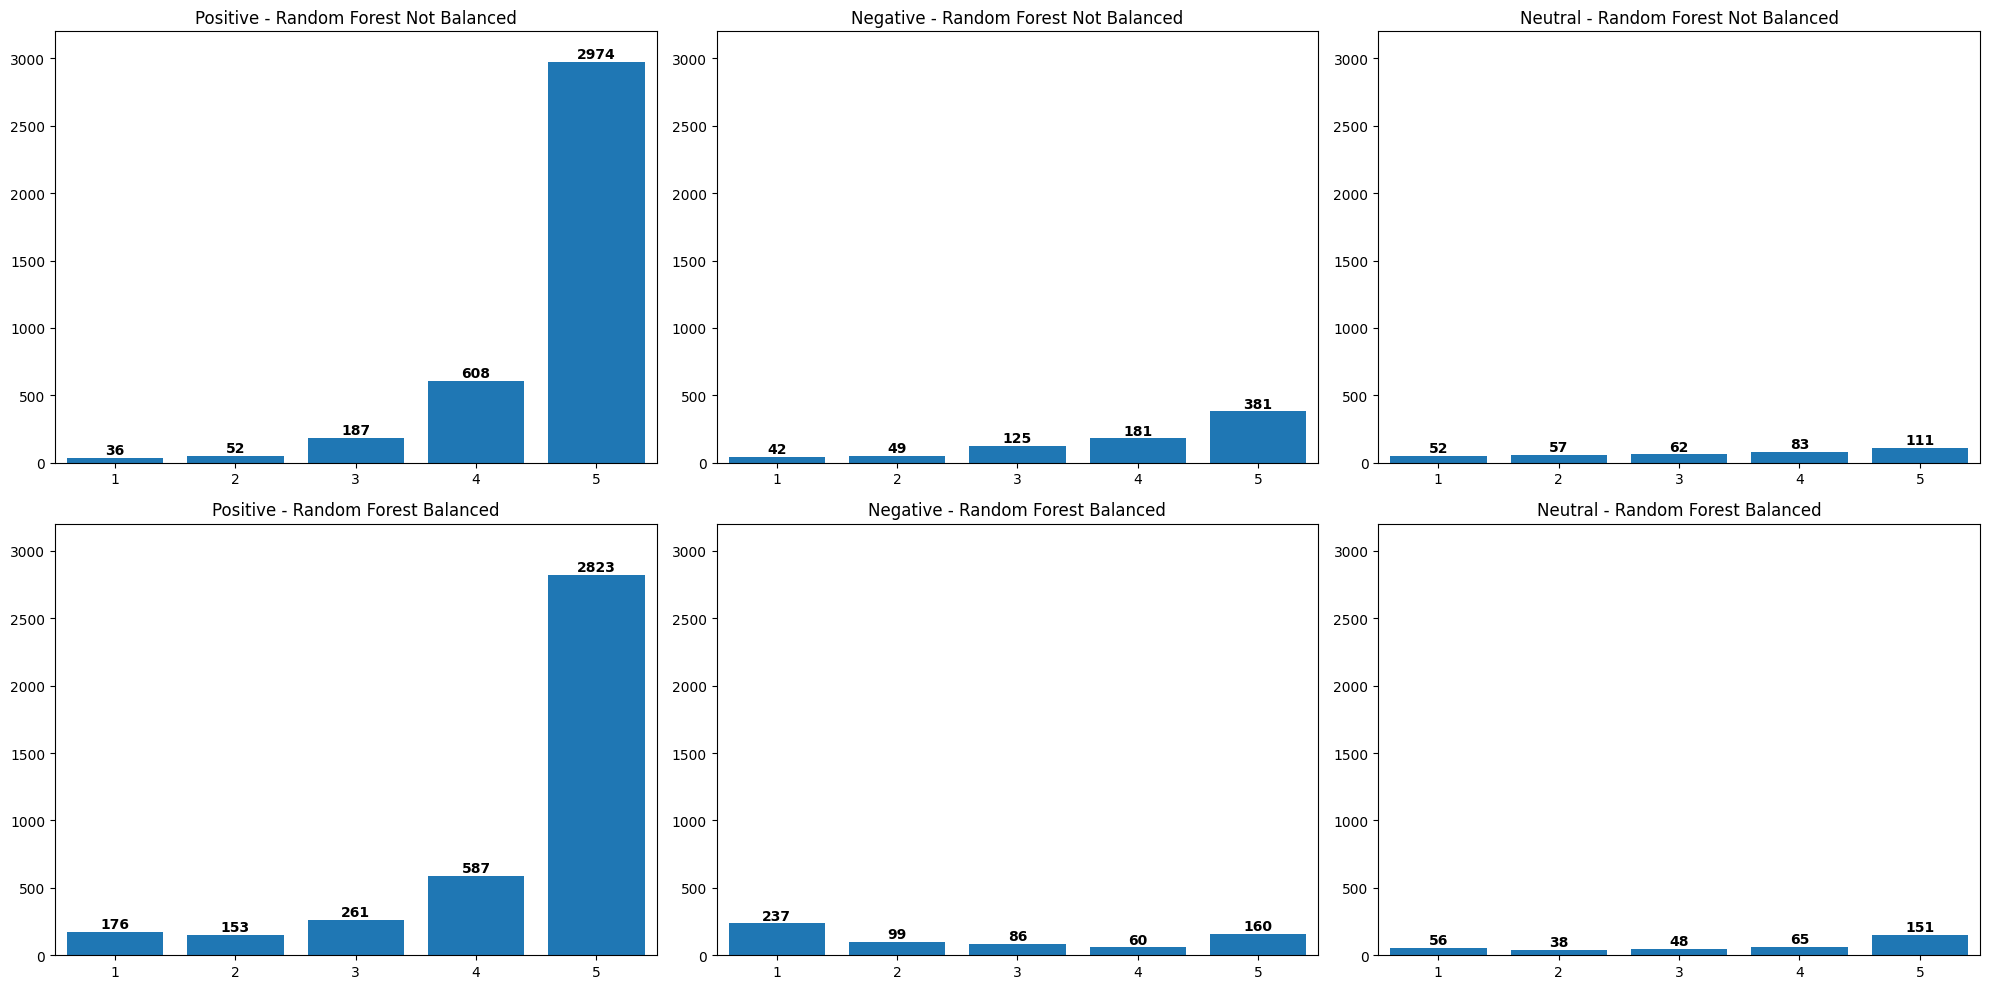

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0,0].bar(aux, pos)
ax[0,0].set_title('Positive - Random Forest Not Balanced')
ax[0,0].set_xlim(0.5, 5.5)
ax[0,0].set_ylim(0.0, 3200.0)

ax[0,1].bar(aux, neg)
ax[0,1].set_title('Negative - Random Forest Not Balanced')
ax[0,1].set_xlim(0.5, 5.5)
ax[0,1].set_ylim(0.0, 3200.0)

ax[0,2].bar(aux, neu)
ax[0,2].set_title('Neutral - Random Forest Not Balanced')
ax[0,2].set_xlim(0.5, 5.5)
ax[0,2].set_ylim(0.0, 3200.0)

# Make some labels.
rects = ax[0,0].patches
labels = [f"{i}" for i in pos]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0,0].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[0,1].patches
labels = [f"{i}" for i in neg]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0,1].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[0,2].patches
labels = [f"{i}" for i in neu]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0,2].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

##################################################################

ax[1,0].bar(aux, pos_b)
ax[1,0].set_title('Positive - Random Forest Balanced')
ax[1,0].set_xlim(0.5, 5.5)
ax[1,0].set_ylim(0.0, 3200.0)

ax[1,1].bar(aux, neg_b)
ax[1,1].set_title('Negative - Random Forest Balanced')
ax[1,1].set_xlim(0.5, 5.5)
ax[1,1].set_ylim(0.0, 3200.0)

ax[1,2].bar(aux, neu_b)
ax[1,2].set_title('Neutral - Random Forest Balanced')
ax[1,2].set_xlim(0.5, 5.5)
ax[1,2].set_ylim(0.0, 3200.0)

# Make some labels.
rects = ax[1,0].patches
labels = [f"{i}" for i in pos_b]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1,0].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[1,1].patches
labels = [f"{i}" for i in neg_b]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1,1].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[1,2].patches
labels = [f"{i}" for i in neu_b]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1,2].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

plt.tight_layout()
plt.show()